<a href="https://colab.research.google.com/github/gignid99/testproj/blob/main/bcancerprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gignid99","key":"dcaeafbb12de7531e7595b1a0823643a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d 'aryashah2k/breast-ultrasound-images-dataset'

Dataset URL: https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset
License(s): CC0-1.0
 89% 174M/195M [00:00<00:00, 213MB/s]
100% 195M/195M [00:01<00:00, 194MB/s]


In [ ]:
!mkdir ultrasound_data
!unzip breast-ultrasound-images-dataset.zip -d ultrasound_data

Archive:  breast-ultrasound-images-dataset.zip
  inflating: ultrasound_data/Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: ultrasound_data/Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: ultrasound_data/Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: ultrasound_data/Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: ultrasound_data/Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: ultrasound_data/Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: ultrasound_data/Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: ultrasound_data/Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: ultrasound_data/Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: ultrasound_data/Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating: ultrasound_data/Dataset_BUSI_with_GT/benign/benign (102)_mask.png  
  inflating: ultrasound_data/Dataset_BUSI_with_GT/benign/benign (103).png  
  inflating: ul

In [ ]:
import numpy as np
import pandas as pd
import os
base_path = "ultrasound_data/Dataset_BUSI_with_GT/"
categories = ["benign","malignant","normal"]

data = []

In [ ]:
for category in categories:
    category_path = os.path.join(base_path, category)
    files = sorted(os.listdir(category_path))


    for file in files:
        if "_mask" in file:
          continue

        img_path = os.path.join(base_path, category, file)
        mask_path = os.path.join(category_path, file.replace(".png", "_mask.png"))
        data.append([img_path, mask_path, category])

    df = pd.DataFrame(data, columns=["Image_path", "Mask_Path","Label"])
    df.head()
    df.tail()
    df.shape
    df.columns
    df.info()
    df.describe()
    df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_path  437 non-null    object
 1   Mask_Path   437 non-null    object
 2   Label       437 non-null    object
dtypes: object(3)
memory usage: 10.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_path  647 non-null    object
 1   Mask_Path   647 non-null    object
 2   Label       647 non-null    object
dtypes: object(3)
memory usage: 15.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_path  780 non-null    object
 1   Mask_Path   780 non-null    object
 2   Label       780 non-null    object
dtypes

<ipython-input-8-6c930914e8cb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Label", palette="viridis", ax=ax)


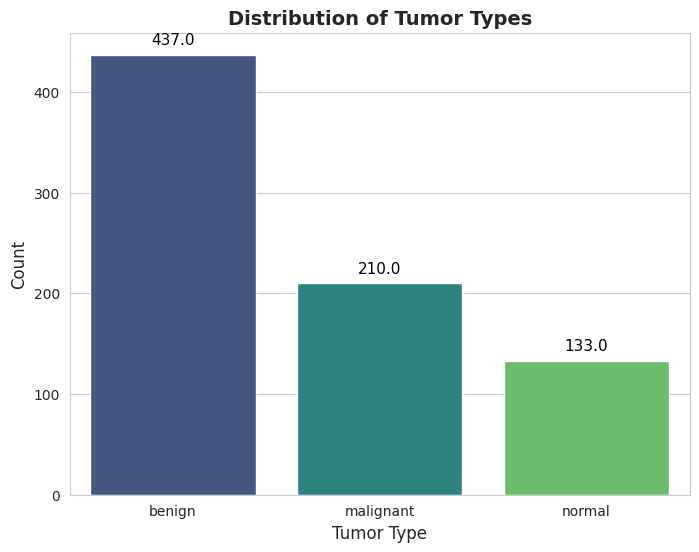

<function matplotlib.pyplot.show(close=None, block=None)>

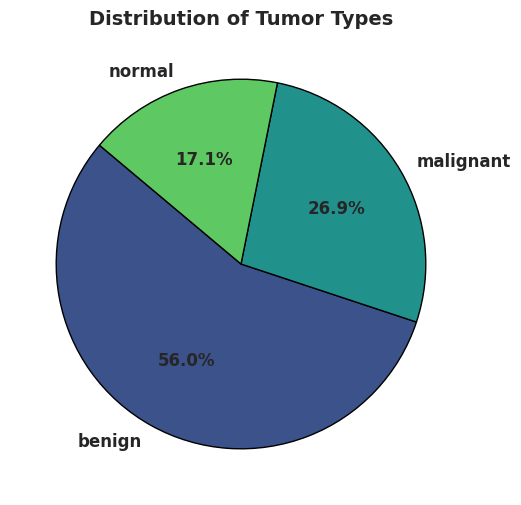

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(data=df, x="Label", palette="viridis", ax=ax)

ax.set_title("Distribution of Tumor Types", fontsize=14, fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()
label_counts = df['Label'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette('viridis', len(label_counts))

ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
       startangle=140, colors=colors,
       textprops={'fontsize': 12, 'weight': 'bold'},
       wedgeprops = {'edgecolor': 'black', 'linewidth': 1})

ax.set_title('Distribution of Tumor Types', fontsize=14, fontweight='bold')

plt.show



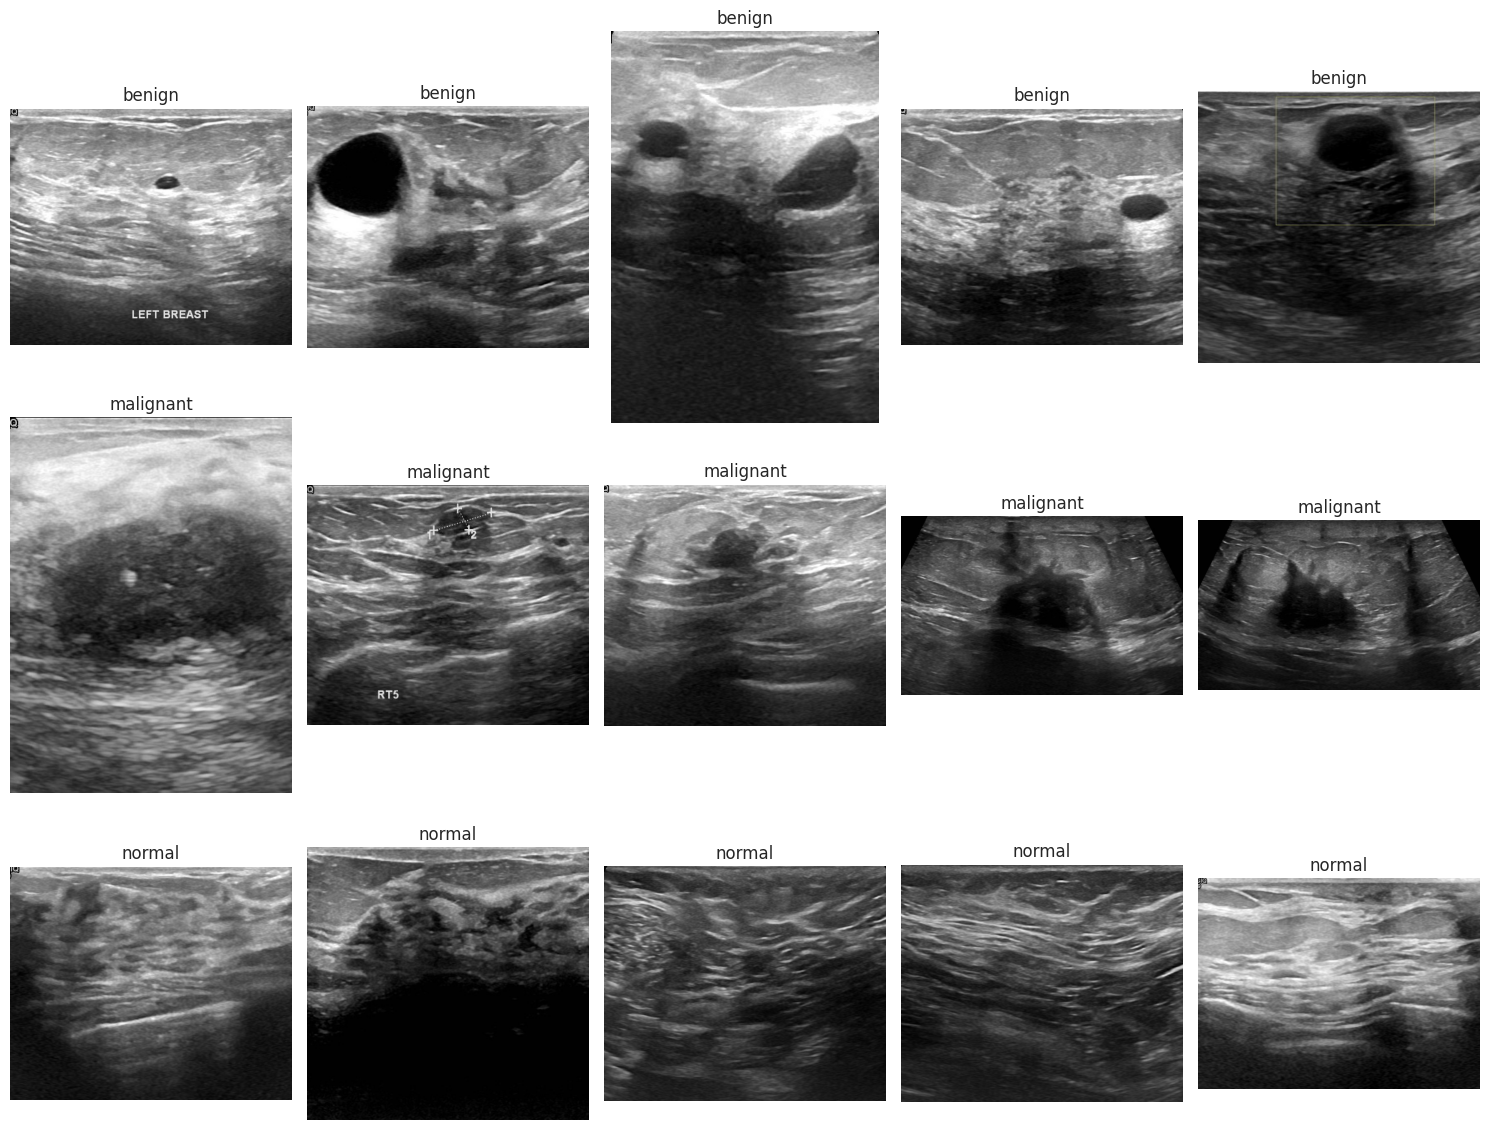

In [ ]:
import cv2

num_images = 5
plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
  category_images = df[df["Label"] ==
    category] ["Image_path"].iloc[:num_images]

  for j, img_path in enumerate(category_images):
      img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
      plt.subplot(len(categories), num_images, i * num_images + j + 1)
      plt.imshow(img)
      plt.axis("off")
      plt.title(category)

plt.tight_layout()
plt.show()